In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour
from mapper_functions import plot_global

from my_functions import read_obsfcstana

In [7]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_i = []
obs_fcst_mean_list_i = []
obs_ana_mean_list_i = []
omf_mean_list_i = []
oma_mean_list_i = []
dates_list_i = []
omf_max_list_i = []
omf_std_list_i = []
oma_max_list_i = []
oma_std_list_i = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20210401', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
        oma_max = np.max(abs(obs_obs - obs_ana))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list_i.append(obs_obs_mean)
    obs_fcst_mean_list_i.append(obs_fcst_mean)
    obs_ana_mean_list_i.append(obs_ana_mean)
    omf_mean_list_i.append(omf_mean)
    oma_mean_list_i.append(oma_mean)
    omf_max_list_i.append(omf_max)
    omf_std_list_i.append(omf_std)
    oma_max_list_i.append(oma_max)
    oma_std_list_i.append(oma_std)
    
    # Append the current date to the dates list
    dates_list_i.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150401
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150501
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150601
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150701
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150801
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20150901
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20151001
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20151101
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20151201
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160101
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160201
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160301
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160401
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160501
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160601
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160701
ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20160801
ASCAT_new_scaling_innov.ens_avg

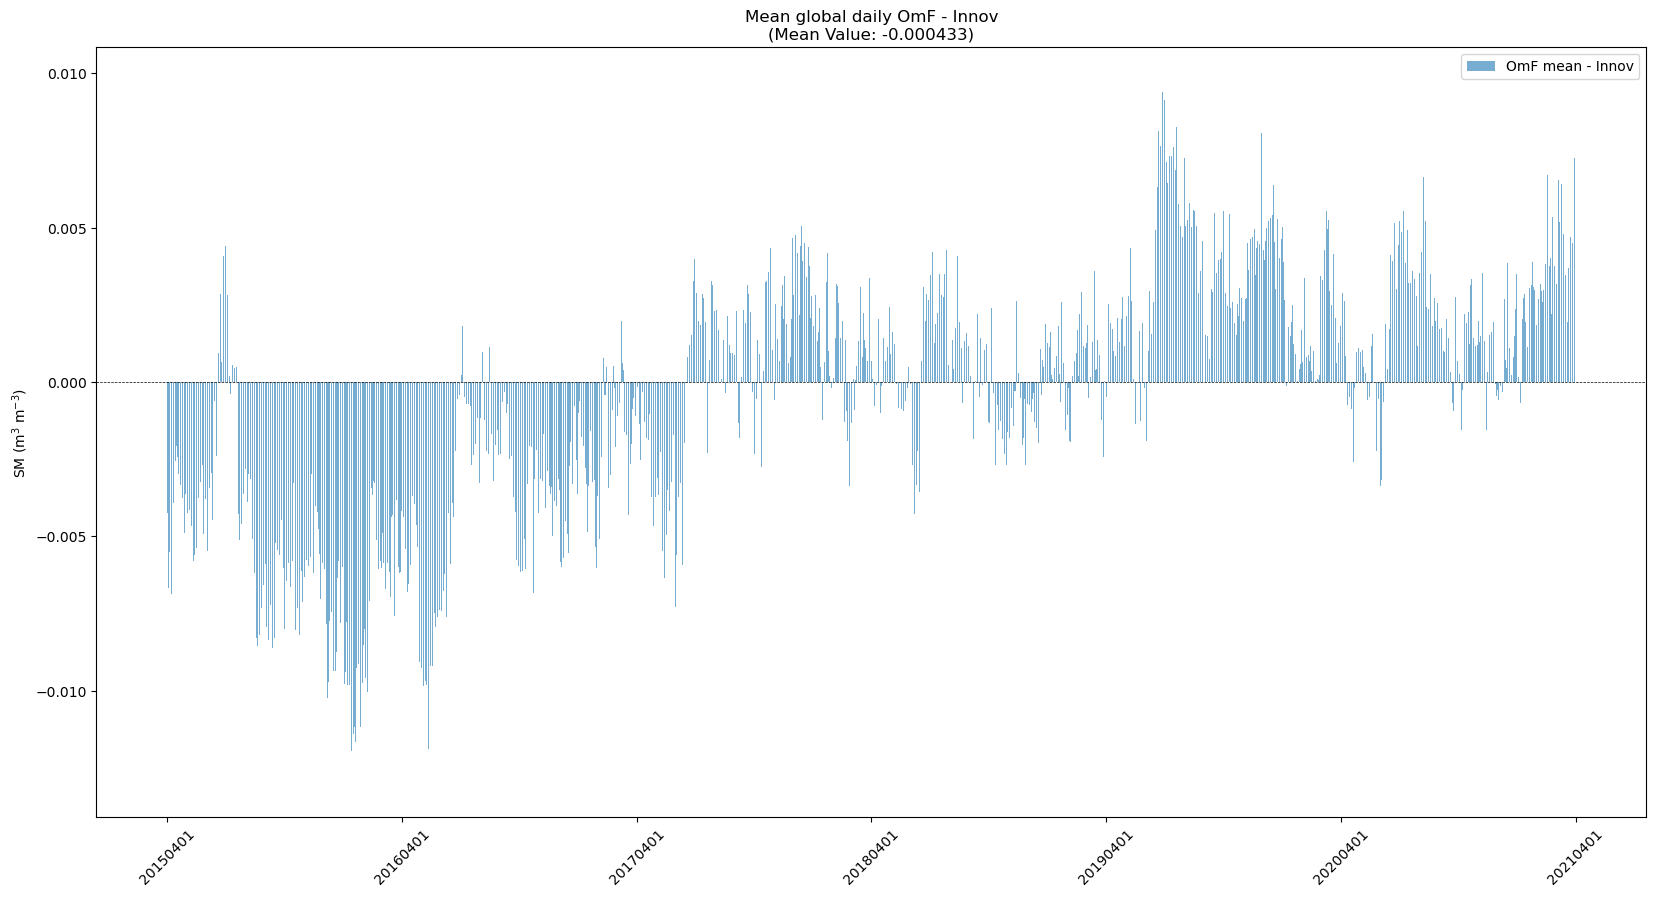

In [14]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))

# Calculate the mean of omf_mean_list_i
mean_value = np.nanmean(omf_mean_list_i)

bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_i))
plt.bar(index, omf_mean_list_i, bar_width, alpha=opacity, label='OmF mean - Innov')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('0401')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

# Add a title with two lines
plt.title(f'Mean global daily OmF - Innov\n(Mean Value: {mean_value:.6f})')

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_mean_ts_i.png')

plt.show()

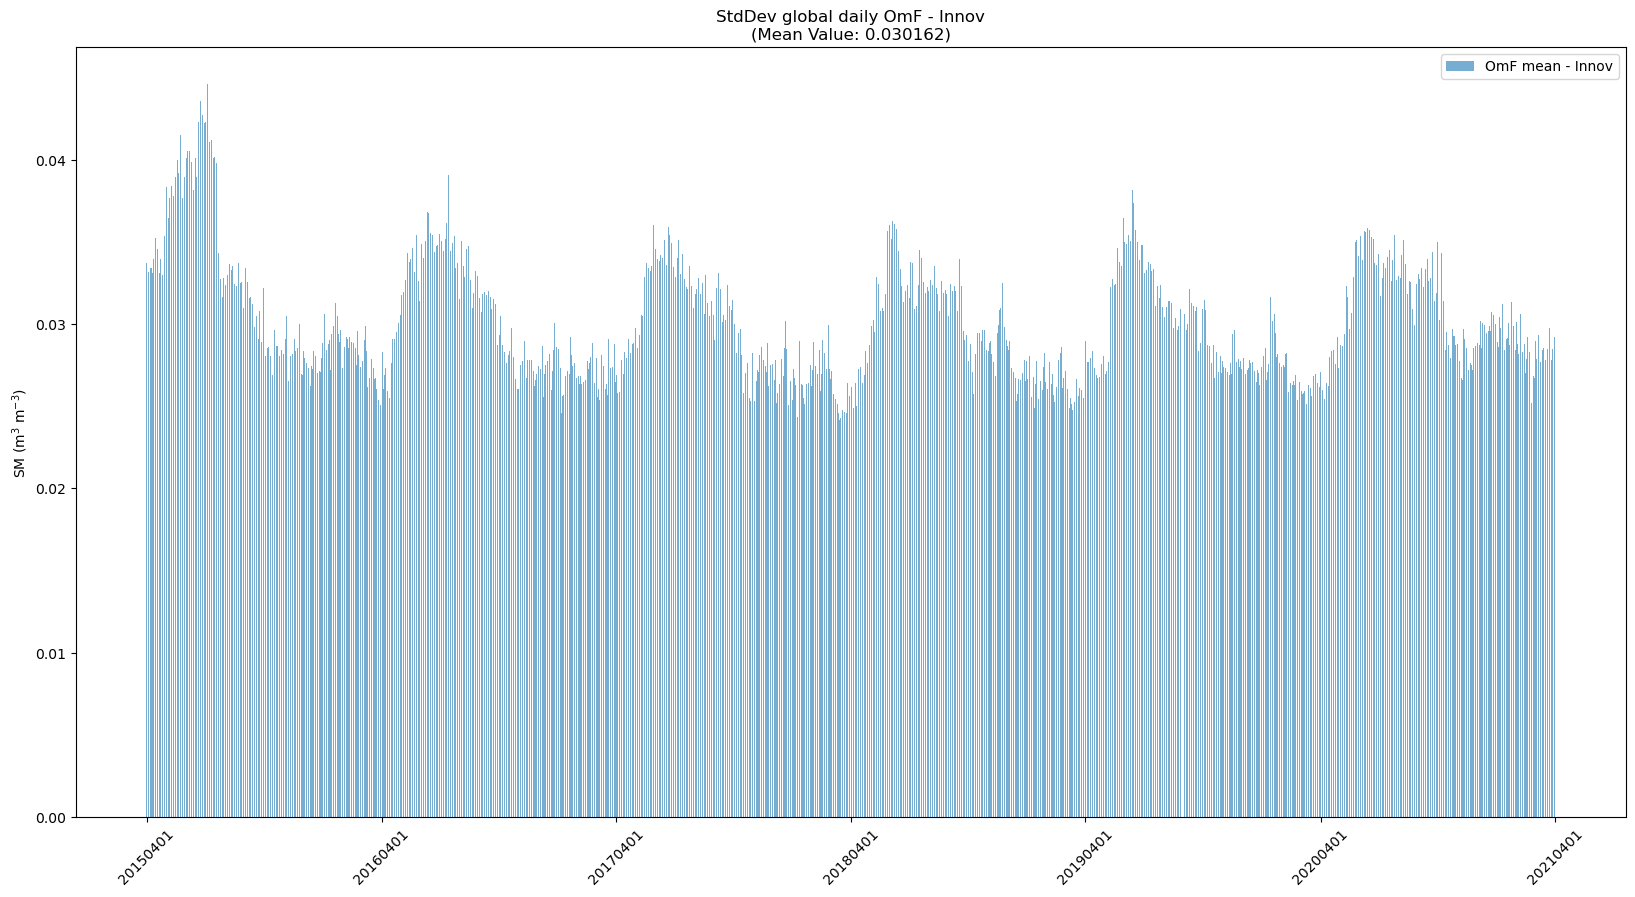

In [15]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))

# Calculate the mean of omf_mean_list_i
mean_value = np.nanmean(omf_std_list_i)

bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_i))
plt.bar(index, omf_std_list_i, bar_width, alpha=opacity, label='OmF mean - Innov')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('0401')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

# Add a title with two lines
plt.title(f'StdDev global daily OmF - Innov\n(Mean Value: {mean_value:.6f})')

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_std_ts_i.png')

plt.show()

In [23]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_a1 = []
obs_fcst_mean_list_a1 = []
obs_ana_mean_list_a1 = []
omf_mean_list_a1 = []
oma_mean_list_a1 = []
dates_list_a1 = []
omf_max_list_a1 = []
omf_std_list_a1 = []
oma_std_list_a1 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160401', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list_a1.append(obs_obs_mean)
    obs_fcst_mean_list_a1.append(obs_fcst_mean)
    obs_ana_mean_list_a1.append(obs_ana_mean)
    omf_mean_list_a1.append(omf_mean)
    oma_mean_list_a1.append(oma_mean)
    omf_max_list_a1.append(omf_max)
    omf_std_list_a1.append(omf_std)
    oma_std_list_a1.append(oma_std)
    
    # Append the current date to the dates list
    dates_list_a1.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150401
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150501
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150601
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150701
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150801
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20150901
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20151001
ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20151101
Current date =  2015-11-02 00:00:00
Current date =  2015-11-03 00:00:00
Current date =  2015-11-04 00:00:00
Current date =  2015-11-05 00:00:00
Current date =  2015-11-06 00:00:00
Current date =  2015-11-07 00:00:00
Current date =  2015-11-08 00:00:00
Current date =  2015-11-09 00:00:00
Current date =  2015-11-10 00:00:00
Current date =  2015-11-11 00:00:00
Current date =  2015-11-12 00:00:00
Current date =  2015-11-13 00:00:00
Current date =  2015-11-14 00:00:00
Current date =  2015-11-15 00:00:00
Current date =  2015-11-

In [27]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_a2 = []
obs_fcst_mean_list_a2 = []
obs_ana_mean_list_a2 = []
omf_mean_list_a2 = []
oma_mean_list_a2 = []
dates_list_a2 = []
omf_max_list_a2 = []
omf_std_list_a2 = []
oma_std_list_a2 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160401', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list_a2.append(obs_obs_mean)
    obs_fcst_mean_list_a2.append(obs_fcst_mean)
    obs_ana_mean_list_a2.append(obs_ana_mean)
    omf_mean_list_a2.append(omf_mean)
    oma_mean_list_a2.append(oma_mean)
    omf_max_list_a2.append(omf_max)
    omf_std_list_a2.append(omf_std)
    oma_std_list_a2.append(oma_std)
    
    # Append the current date to the dates list
    dates_list_a2.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150401
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150501
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150601
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150701
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150801
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20150901
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20151001
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20151101
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20151201
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20160101
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20160201
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20160301
ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20160401


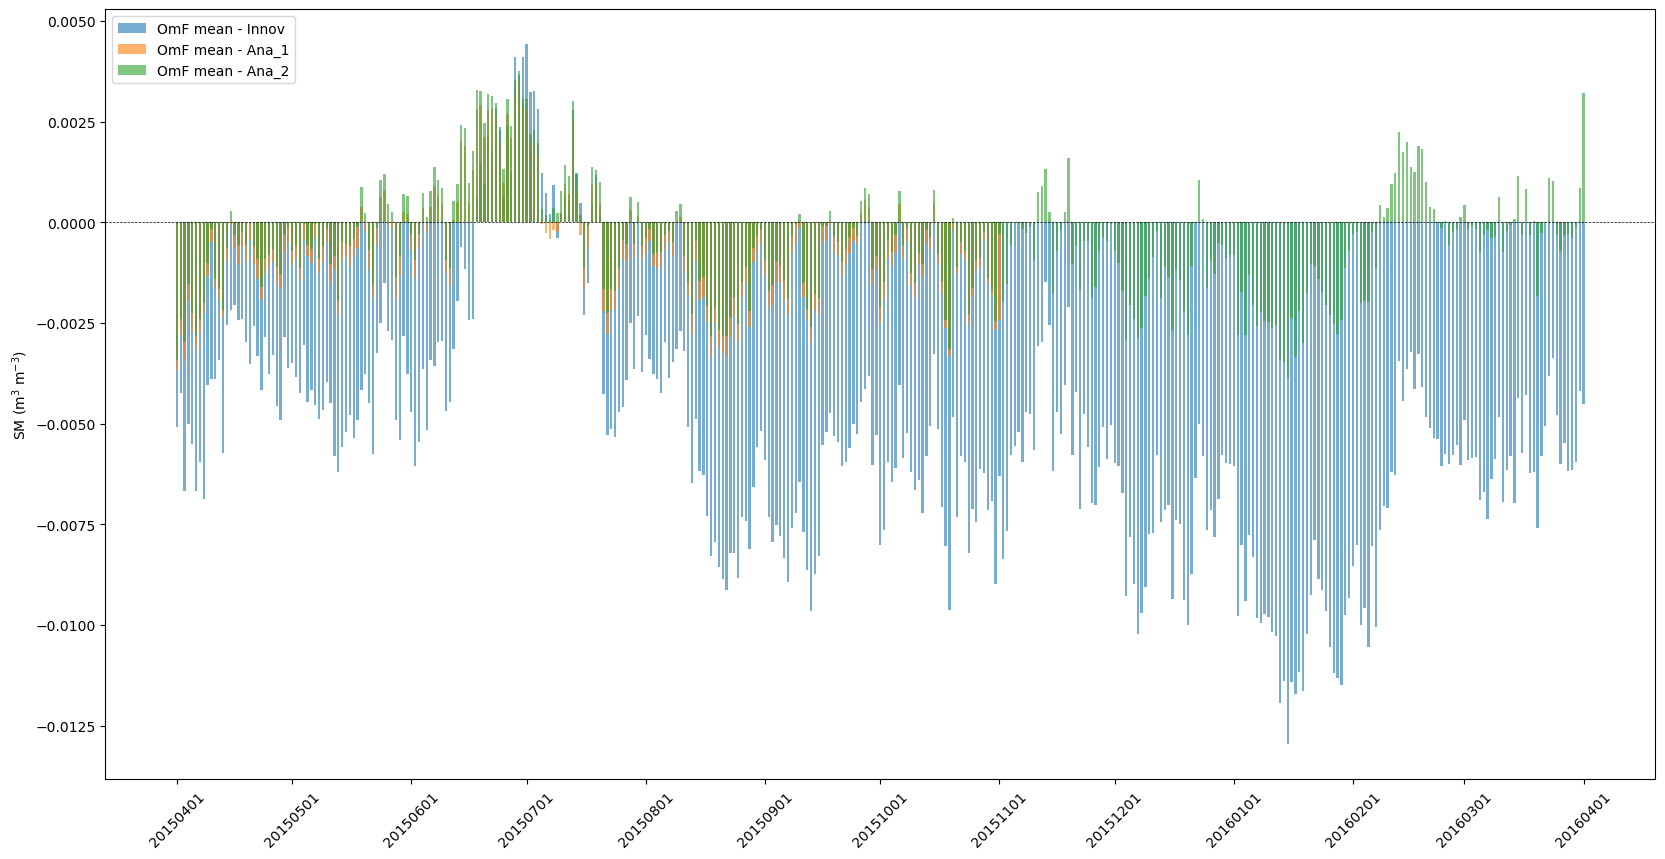

In [28]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_a1))
plt.bar(index, omf_mean_list_i[:len(index)], bar_width, alpha=opacity, label='OmF mean - Innov')
plt.bar(index, omf_mean_list_a1, bar_width, alpha=opacity, label='OmF mean - Ana_1')
plt.bar(index, omf_mean_list_a2, bar_width, alpha=opacity, label='OmF mean - Ana_2')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a1 if date.endswith('01')]
xtick_indices = [dates_list_a1.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_mean_ts_i_a.png')

plt.show()

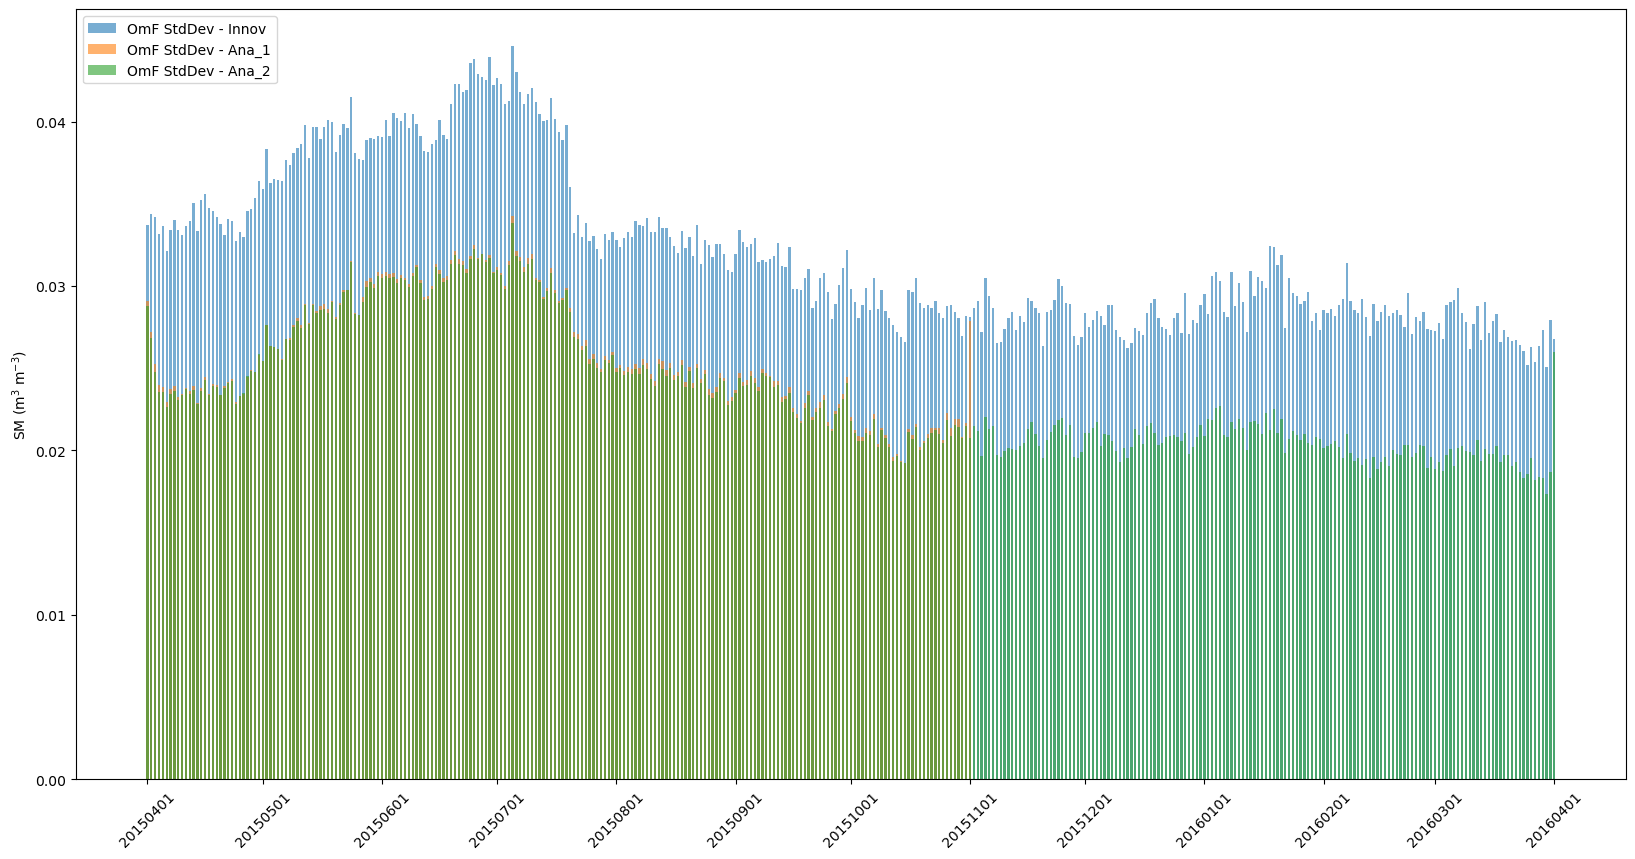

In [29]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_a1))
plt.bar(index, omf_std_list_i[:len(index)], bar_width, alpha=opacity, label='OmF StdDev - Innov')
plt.bar(index, omf_std_list_a1, bar_width, alpha=opacity, label='OmF StdDev - Ana_1')
plt.bar(index, omf_std_list_a2, bar_width, alpha=opacity, label='OmF StdDev - Ana_2')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a1 if date.endswith('01')]
xtick_indices = [dates_list_a1.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Save the figure as a PNG file
plt.savefig('OmF_std_ts_i_a.png')

plt.show()

In [139]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04']

# Define the common file name start
file_name_start = 'ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.2015040'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []


# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)

In [140]:
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs

saveflag = False

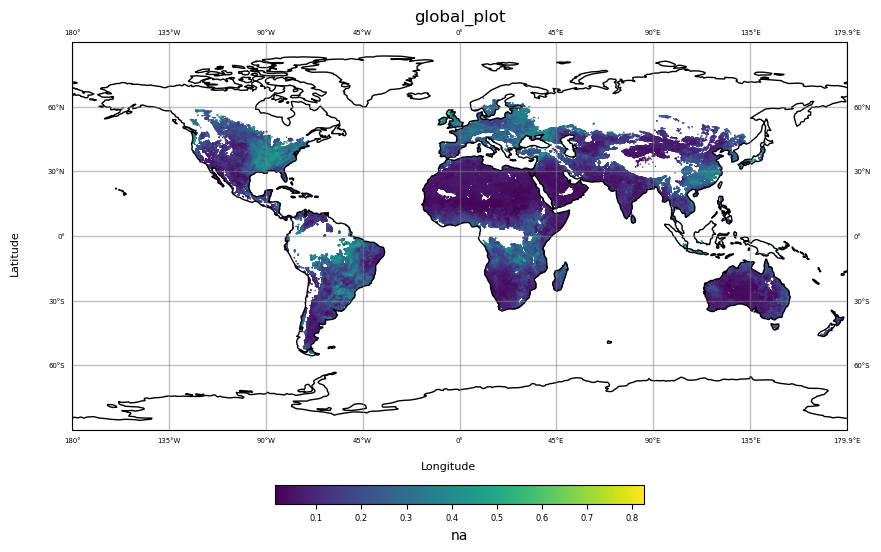

In [141]:
plot_global(obarray,saveflag)

In [142]:
nodata = -9999

obs_obs[obs_obs == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan

In [143]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

# Calculate lon and lat
lon = np.linspace(ll_lon, ll_lon + nx * dlon, nx)
lat = np.linspace(ll_lat, ll_lat + ny * dlat, ny)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

In [144]:
n_obs = len(obs_obs)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

In [145]:
for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

In [146]:
# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_fcst[i])

In [147]:
# Calculate the mean of the observations in each grid cell
obs_mean = np.zeros([nx, ny])
obs_count = np.zeros([nx, ny])
fcst_mean = np.zeros([nx, ny])
omf_mean = np.zeros([nx, ny])
omf_max = np.zeros([nx, ny])
omf_std = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean[i, j] = np.nanmean(obs_list[i][j])
            obs_count[i, j] = len(obs_list[i][j])
            fcst_mean[i, j] = np.nanmean(fcst_list[i][j])
            omf_mean[i, j] = np.nanmean(omf_list[i][j])
            omf_max[i, j] = np.nanmax(abs(np.array(omf_list[i][j])))
            omf_std[i, j] = np.nanstd(omf_list[i][j])
        else:
            obs_mean[i, j] = np.nan
            obs_count[i, j] = np.nan
            fcst_mean[i, j] = np.nan
            omf_mean[i, j] = np.nan
            omf_max[i, j] = np.nan
            omf_std[i, j] = np.nan

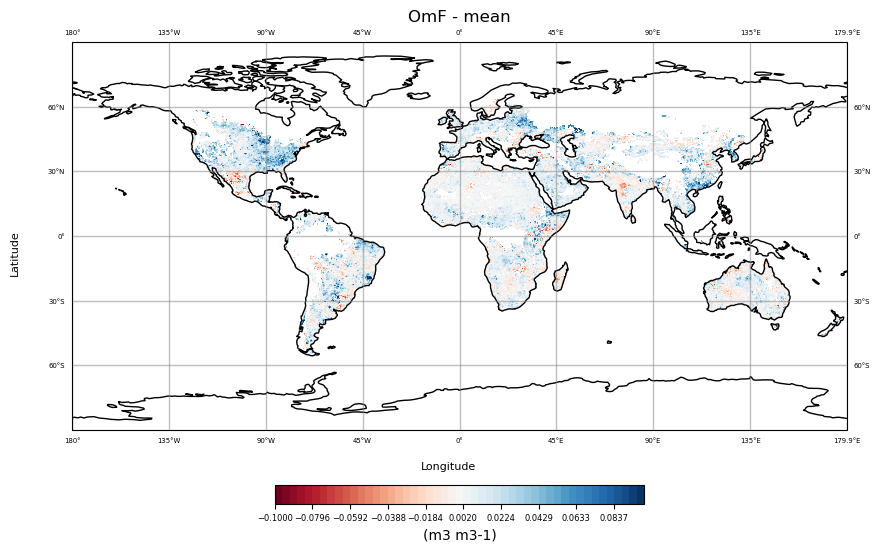

In [148]:
plot_global_contour(lon2d, lat2d, omf_mean.T, False, 'OmF - mean', '(m3 m3-1)',-0.1,0.1)

In [149]:
np.nanmean(omf_mean)

-0.004847448795973981